# Task 4 - Correlation of clusters with bulk RNA seq analysis of the clones
This notebook analyses the correlation of the different clusters with the bulk RNA seq analysis of the clones. This depends on the results of task 2 and 3 and a given matrix of the bulk RNA seq.

This notebook is based on the single-cell best practices book (https://github.com/theislab/single-cell-best-practices/). For further explanations of the applied methods please refer to above source.

# Gene set enrichment and pathway analysis 

### Prepare and explore the data

In [1]:
# import os
# os.environ['R_HOME'] = '/home/icb/till.richter/anaconda3/envs/da_env/lib/R'

In [2]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import anndata as ad
import gdown
import anndata2ri
import rpy2
from rpy2.robjects import r
import random
import session_info
import os
import matplotlib.pyplot as plt
from matplotlib import colors
anndata2ri.activate()

In [3]:
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

In [4]:
%load_ext rpy2.ipython

In [5]:
!python -m rpy2.situation

rpy2 version:
3.5.1
Python version:
3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
[GCC 9.4.0]
Looking for R's HOME:
    Environment variable R_HOME: /home/icb/till.richter/anaconda3/envs/scib-pipeline-R4.0/lib/R
    Calling `R RHOME`: /home/icb/till.richter/anaconda3/envs/scib-pipeline-R4.0/lib/R
    Environment variable R_LIBS_USER: ~/R/x86_64-conda-linux-gnu-library/4.0
R's additions to LD_LIBRARY_PATH:
/home/icb/till.richter/anaconda3/envs/scib-pipeline-R4.0/lib/R/lib/:/home/icb/till.richter/anaconda3/envs/scib-pipeline-R4.0/lib/R/lib/
R version:
    In the PATH: R version 4.0.5 (2021-03-31) -- "Shake and Throw"
    Loading R library from rpy2: OK
Additional directories to load R packages from:

C extension compilation:
  include:
  ['/home/icb/till.richter/anaconda3/envs/scib-pipeline-R4.0/lib/R/include']
  libraries:
  ['R', 'pcre2-8', 'lzma', 'bz2', 'z', 'rt', 'dl', 'm', 'iconv', 'icuuc', 'icui18n']
  library_dirs:
  ['/home/icb/till.richter/anaconda3/envs/

In [6]:
%%R
suppressPackageStartupMessages({
    library(SingleCellExperiment)
    # library(fgsea)
    library(AUCell)
    # library(ggplot2)
})

CONDA

In [7]:
adata_read = sc.read_h5ad('../data/adata/processed_adata1.h5ad')
adata_read

AnnData object with n_obs × n_vars = 16747 × 10512
    obs: 'sample_id', 'sample_nr', 'donor', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'log_counts', 'n_counts', 'n_genes', 'size_factors', 'louvain_r1', 'louvain_r0.5'
    var: 'mt', 'n_cells_by_counts-0-0-0', 'mean_counts-0-0-0', 'log1p_mean_counts-0-0-0', 'pct_dropout_by_counts-0-0-0', 'total_counts-0-0-0', 'log1p_total_counts-0-0-0', 'n_cells-0-0-0', 'n_cells_by_counts-1-0-0', 'mean_counts-1-0-0', 'log1p_mean_counts-1-0-0', 'pct_dropout_by_counts-1-0-0', 'total_counts-1-0-0', 'log1p_total_counts-1-0-0', 'n_cells-1-0-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'log1p_mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'log1p_total_counts-1-0', 'n_cells-1-0', 'n_cells_by_counts-1', 'mean_coun

In [8]:
adata_read.obs

sample_id sample_nr  donor  n_genes_by_counts  \
AAACCCAAGATCACCT-1-1-0-0   9591-2D         0  mouse               1438   
AAACCCAAGCACACAG-1-1-0-0   9591-2D         0  mouse               2030   
AAACCCAAGGCATCTT-1-1-0-0   9591-2D         0  mouse               1581   
AAACCCAAGGGTAGCT-1-1-0-0   9591-2D         0  mouse               2930   
AAACCCACACACGGTC-1-1-0-0   9591-2D         0  mouse                650   
...                            ...       ...    ...                ...   
TTTGTTGGTAGCTAAA-1-1-0-0   9591-2D         0  mouse               3308   
TTTGTTGGTTGCTCGG-1-1-0-0   9591-2D         0  mouse                546   
TTTGTTGTCCACTTTA-1-1-0-0   9591-2D         0  mouse                433   
TTTGTTGTCCCGTTGT-1-1-0-0   9591-2D         0  mouse               1063   
TTTGTTGTCGAGTACT-1-1-0-0   9591-2D         0  mouse               1525   

                          log1p_n_genes_by_counts  total_counts  \
AAACCCAAGATCACCT-1-1-0-0                 7.271704        3167.0   
AAACCCAAGCACACAG-1-1-0-0                 7.616284        5085.0   
AAACCCAAGGCATCTT-1-1-0-0                 7.366445        3452.0   
AAACCCAAGGGTAGCT-1-1-0-0                 7.983099        9941.0   
AAACCCACACACGGTC-1-1-0-0                 6.478510        1089.0   
...                                           ...           ...   
TTTGTTGGTAGCTAAA-1-1-0-0                 8.104401       11144.0   
TTTGTTGGTTGCTCGG-1-1-0-0                 6.304449         970.0   
TTTGTTGTCCACTTTA-1-1-0-0                 6.073045         594.0   
TTTGTTGTCCCGTTGT-1-1-0-0                 6.969791        1920.0   
TTTGTTGTCGAGTACT-1-1-0-0                 7.330405        4407.0   

                          log1p_total_counts  pct_counts_in_top_50_genes  \
AAACCCAAGATCACCT-1-1-0-0            8.060856                   31.796653   
AAACCCAAGCACACAG-1-1-0-0            8.534247                   28.456244   
AAACCCAAGGCATCTT-1-1-0-0            8.146998                   32.097335   
AAACCCAAGGGTAGCT-1-1-0-0            9.204523                   34.513630   
AAACCCACACACGGTC-1-1-0-0            6.993933                   32.690542   
...                                      ...                         ...   
TTTGTTGGTAGCTAAA-1-1-0-0            9.318747                   29.872577   
TTTGTTGGTTGCTCGG-1-1-0-0            6.878326                   38.556701   
TTTGTTGTCCACTTTA-1-1-0-0            6.388561                   30.639731   
TTTGTTGTCCCGTTGT-1-1-0-0            7.560601                   30.729167   
TTTGTTGTCGAGTACT-1-1-0-0            8.391176                   40.231450   

                          pct_counts_in_top_100_genes  \
AAACCCAAGATCACCT-1-1-0-0                    43.195453   
AAACCCAAGCACACAG-1-1-0-0                    40.255654   
AAACCCAAGGCATCTT-1-1-0-0                    43.134415   
AAACCCAAGGGTAGCT-1-1-0-0                    46.604969   
AAACCCACACACGGTC-1-1-0-0                    43.801653   
...                                               ...   
TTTGTTGGTAGCTAAA-1-1-0-0                    41.358579   
TTTGTTGGTTGCTCGG-1-1-0-0                    51.340206   
TTTGTTGTCCACTTTA-1-1-0-0                    43.939394   
TTTGTTGTCCCGTTGT-1-1-0-0                    41.197917   
TTTGTTGTCGAGTACT-1-1-0-0                    52.847742   

                          pct_counts_in_top_200_genes  \
AAACCCAAGATCACCT-1-1-0-0                    54.152195   
AAACCCAAGCACACAG-1-1-0-0                    50.855457   
AAACCCAAGGCATCTT-1-1-0-0                    53.418308   
AAACCCAAGGGTAGCT-1-1-0-0                    55.577910   
AAACCCACACACGGTC-1-1-0-0                    58.677686   
...                                               ...   
TTTGTTGGTAGCTAAA-1-1-0-0                    51.390883   
TTTGTTGGTTGCTCGG-1-1-0-0                    64.329897   
TTTGTTGTCCACTTTA-1-1-0-0                    60.774411   
TTTGTTGTCCCGTTGT-1-1-0-0                    52.343750   
TTTGTTGTCGAGTACT-1-1-0-0                    62.695711   

                          pct_counts_in_top_500_

In [9]:
adata = adata_read.copy()

In [10]:
adata.layers['counts'] = adata.X

For simplicity, here we run a t-test using `rank_genes_groups` in `scanpy` to rank genes according to their test statistics for differential expression:

In [11]:
adata.obs['group'] = adata.obs['louvain_r0.5'].astype('string')

In [12]:
# find DE genes by t-test
adata.uns['log1p']["base"] = None
adata.obs['group'] = adata.obs['louvain_r0.5'].astype('string')
sc.tl.rank_genes_groups(adata, 'group', method='t-test', key_added = "t-test")

### Get the Pathway and map it to mm

In [13]:
from pyorthomap import FindOrthologs 
hs2mm = FindOrthologs(
          host = 'http://www.ensembl.org',
          mart = 'ENSEMBL_MART_ENSEMBL',
          from_dataset = 'hsapiens_gene_ensembl',
          to_dataset = 'mmusculus_gene_ensembl',
          from_filters = 'hgnc_symbol',
          from_values = ['TP53', 'TERT'],
          to_attributes = ['external_gene_name'],
          to_homolog_attribute = 'mmusculus_homolog_ensembl_gene',
          from_gene_id_name = 'human_ensembl_gene_id',
          to_gene_id_name = 'mouse_ensembl_gene_id'
    )
    
hs2mm.map()

  0%|          | 0/1 [00:00<?, ?it/s]

external_gene_name mouse_ensembl_gene_id human_ensembl_gene_id hgnc_symbol
0               Tert    ENSMUSG00000021611       ENSG00000164362        TERT
1              Trp53    ENSMUSG00000059552       ENSG00000141510        TP53

### Pathways from Clones
branched mesenchymal, firework, starlike2 for the 16992

ALBO, blownup, thick-like, tree-like for the 9591

In [14]:
# all_pathways_mesenchymal = pd.read_excel('../data/2D-3D Overlapping markers_Highlighted.xlsx', sheet_name='Overlapping_Mesenchymal')
all_pathways_epithelial = pd.read_excel('../data/2D-3D Overlapping markers_Highlighted.xlsx', sheet_name='Overlapping_Epithelial')

albo2d_pathway = all_pathways_epithelial['ALBO 2D'].dropna().tolist()
albo2d_pathway = [x.strip(' ') for x in albo2d_pathway]

blownup2d_pathway = all_pathways_epithelial['Blownup 2D'].dropna().tolist()
blownup2d_pathway = [x.strip(' ') for x in blownup2d_pathway]

thicklike2d_pathway = all_pathways_epithelial['Thicklike 2D'].dropna().tolist()
thicklike2d_pathway = [x.strip(' ') for x in thicklike2d_pathway]

treelike2d_pathway = all_pathways_epithelial['Treelike 2D'].dropna().tolist()
treelike2d_pathway = [x.strip(' ') for x in treelike2d_pathway]
all_pathways_epithelial

ALBO 2D            ALBO 3D Overlapping  \
0    Acot1      1700025G04Rik            Car8   
1    Anxa13     2410002F23Rik           Casp1   
2    Car8       5730455P16Rik           Casp4   
3    Casp1      AI506816                Cmtm3   
4    Casp4              Abcd1             Cpq   
..         ...                ...         ...   
477        NaN                NaN         NaN   
478        NaN                NaN         NaN   
479        NaN                NaN         NaN   
480        NaN                NaN         NaN   
481        NaN                NaN         NaN   

                          Unnamed: 3 Blownup 2D         Blownup 3D  \
0                                NaN  Csn3       0610040J01Rik       
1                                NaN  Cth        5330417C22Rik       
2                                NaN  Dmbt1      9530036O11Rik       
3    Transmembrane Domain Containing  Dok2               Ablim1      
4                                NaN  Fabp1              Acox2       
..                               ...        ...                ...   
477                              NaN        NaN                NaN   
478                              NaN        NaN                NaN   
479                              NaN        NaN                NaN   
480                              NaN        NaN                NaN   
481                              NaN        NaN                NaN   

    Overlapping.1  Unnamed: 7 Thicklike 2D       Thicklike 3D Overlapping.2  \
0           Dmbt1         NaN    Ly6a       1810037I17Rik             Ckap4   
1           Krt13  Keratin 13    Cldn2      Abhd11os                  Crip2   
2             NaN         NaN    Igfbp7             Abhd2             Fxyd5   
3             NaN         NaN    Palmd              Adam15            Hbegf   
4             NaN         NaN    Ankmy1             Agpat2            Krt14   
..            ...         ...          ...                ...           ...   
477           NaN         NaN          NaN          Zdhhc2              NaN   
478           NaN         NaN          NaN          Zfp706              NaN   
479           NaN         NaN          NaN          Zg16                NaN   
480           NaN         NaN          NaN          mt-Tp               NaN   
481           NaN         NaN          NaN          mt-Tv               NaN   

                           Unnamed: 11 Treelike 2D Treelike 3D Overlapping.3  
0    Cytoskeleton-associated protein 4   Il1rn         Ephx2           Il1rn  
1                                  NaN   Acsm3       Acaa1b            Acsm3  
2                                  NaN   Cxcl5       Upk1b              Dio3  
3                                  NaN   Dio3        Spint1           Dio3os  
4                           Keratin 14   Dio3os      Klhl13             Lipa  
..                                 ...         ...         ...           ...  
477                                NaN         NaN         NaN           NaN  
478                                NaN         NaN         NaN           NaN  
479                                NaN         NaN         NaN           NaN  
480                                NaN         NaN         NaN           NaN  
481                                NaN         NaN         NaN           NaN  

[482 rows x 15 columns]

In [15]:
# all_pathways_mesenchymal = pd.read_excel('../data/2D-3D Overlapping markers_Highlighted.xlsx', sheet_name='Overlapping_Mesenchymal')
all_pathways_epithelial = pd.read_excel('../data/2D-3D Overlapping markers_Highlighted.xlsx', sheet_name='Overlapping_Epithelial')

albo3d_pathway = all_pathways_epithelial['ALBO 3D'].dropna().tolist()
albo3d_pathway = [x.strip(' ') for x in albo3d_pathway]

blownup3d_pathway = all_pathways_epithelial['Blownup 3D'].dropna().tolist()
blownup3d_pathway = [x.strip(' ') for x in blownup3d_pathway]

thicklike3d_pathway = all_pathways_epithelial['Thicklike 3D'].dropna().tolist()
thicklike3d_pathway = [x.strip(' ') for x in thicklike3d_pathway]

treelike3d_pathway = all_pathways_epithelial['Treelike 3D'].dropna().tolist()
treelike3d_pathway = [x.strip(' ') for x in treelike3d_pathway]
all_pathways_epithelial

ALBO 2D            ALBO 3D Overlapping  \
0    Acot1      1700025G04Rik            Car8   
1    Anxa13     2410002F23Rik           Casp1   
2    Car8       5730455P16Rik           Casp4   
3    Casp1      AI506816                Cmtm3   
4    Casp4              Abcd1             Cpq   
..         ...                ...         ...   
477        NaN                NaN         NaN   
478        NaN                NaN         NaN   
479        NaN                NaN         NaN   
480        NaN                NaN         NaN   
481        NaN                NaN         NaN   

                          Unnamed: 3 Blownup 2D         Blownup 3D  \
0                                NaN  Csn3       0610040J01Rik       
1                                NaN  Cth        5330417C22Rik       
2                                NaN  Dmbt1      9530036O11Rik       
3    Transmembrane Domain Containing  Dok2               Ablim1      
4                                NaN  Fabp1              Acox2       
..                               ...        ...                ...   
477                              NaN        NaN                NaN   
478                              NaN        NaN                NaN   
479                              NaN        NaN                NaN   
480                              NaN        NaN                NaN   
481                              NaN        NaN                NaN   

    Overlapping.1  Unnamed: 7 Thicklike 2D       Thicklike 3D Overlapping.2  \
0           Dmbt1         NaN    Ly6a       1810037I17Rik             Ckap4   
1           Krt13  Keratin 13    Cldn2      Abhd11os                  Crip2   
2             NaN         NaN    Igfbp7             Abhd2             Fxyd5   
3             NaN         NaN    Palmd              Adam15            Hbegf   
4             NaN         NaN    Ankmy1             Agpat2            Krt14   
..            ...         ...          ...                ...           ...   
477           NaN         NaN          NaN          Zdhhc2              NaN   
478           NaN         NaN          NaN          Zfp706              NaN   
479           NaN         NaN          NaN          Zg16                NaN   
480           NaN         NaN          NaN          mt-Tp               NaN   
481           NaN         NaN          NaN          mt-Tv               NaN   

                           Unnamed: 11 Treelike 2D Treelike 3D Overlapping.3  
0    Cytoskeleton-associated protein 4   Il1rn         Ephx2           Il1rn  
1                                  NaN   Acsm3       Acaa1b            Acsm3  
2                                  NaN   Cxcl5       Upk1b              Dio3  
3                                  NaN   Dio3        Spint1           Dio3os  
4                           Keratin 14   Dio3os      Klhl13             Lipa  
..                                 ...         ...         ...           ...  
477                                NaN         NaN         NaN           NaN  
478                                NaN         NaN         NaN           NaN  
479                                NaN         NaN         NaN           NaN  
480                                NaN         NaN         NaN           NaN  
481                                NaN         NaN         NaN           NaN  

[482 rows x 15 columns]

In [16]:
%R -i albo3d_pathway
%R -i blownup3d_pathway
%R -i thicklike3d_pathway
%R -i treelike3d_pathway

In [17]:
%R -i albo2d_pathway
%R -i blownup2d_pathway
%R -i thicklike2d_pathway
%R -i treelike2d_pathway

### Gene set enrichment for complex experimental designs using limma-fry and pseudo-bulks

#### Create pseudo-bulk samples and explore the data

In [20]:
def aggregate_and_filter(
    adata, 
    cell_identity=None, 
    sample_key=None, 
    condition_key='condition', 
    cell_identity_key='cell_identity',
    obs_to_keep=[], # which additional metadata to keep, e.g. gender, age, etc.
    replicates_per_sample=3,
    NUM_OF_CELL_PER_SAMPLE = 75
):
    
    adata_cell_pop = adata.copy()
    # subset adata to the given cell identity
    if cell_identity:
        print('Cell identity is true')
        adata_cell_pop = adata[adata.obs[cell_identity_key] == cell_identity].copy()
    # re-filter for this cell population
    # sc.pp.filter_genes(adata_cell_pop, min_cells=3) # leave this out for now
    
    if sample_key:
        print('We do have samples and/or patients')
        
        # if cells are from different samples and/or patients, make replicates per sample - condition - cell type
        # no use of condition_key. may need updates
        
        
        # check which donors to keep according to the number of cells specified with NUM_OF_CELL_PER_DONOR 
        size_by_donor = adata_cell_pop.obs.groupby([sample_key]).size()
        donors_to_drop = [donor for donor in size_by_donor.index if size_by_donor[donor] <= NUM_OF_CELL_PER_SAMPLE]
        df = pd.DataFrame(columns=[*adata_cell_pop.var_names, *obs_to_keep])

        adata_cell_pop.obs[sample_key] = adata_cell_pop.obs[sample_key].astype('category')
        donors=adata_cell_pop.obs[sample_key].cat.categories
        
        for i, donor in enumerate(donors):
            print(f'Processing donor {i+1} out of {len(donors)}...', end='\r')
            if donor not in donors_to_drop:
                adata_donor = adata_cell_pop[adata_cell_pop.obs[sample_key] == donor]
                # create replicates for each donor
                indices = list(adata_donor.obs_names)
                random.shuffle(indices)
                indices = np.array_split(np.array(indices), replicates_per_sample)
                for i, rep_idx in enumerate(indices):
                    adata_replicate = adata_donor[rep_idx]
                    # specify how to aggregate: sum gene expression for each gene for each donor and also keep the condition information
                    agg_dict = {gene: 'mean' for gene in adata_replicate.var_names}
                    for obs in obs_to_keep:
                        agg_dict[obs] = 'first'
                    # create a df with all genes, donor and condition info
                    df_donor = pd.DataFrame(adata_replicate.X)
                    df_donor.index = adata_replicate.obs_names
                    df_donor.columns = adata_replicate.var_names
                    df_donor = df_donor.join(adata_replicate.obs[obs_to_keep])
                    # aggregate
                    df_donor = df_donor.groupby(sample_key).agg(agg_dict)
                    df_donor[sample_key] = donor
                    df.loc[f'donor_{donor}_{dataset_name}'] = df_donor.loc[donor]
    else:
        print('We do not have samples and/or patients')
        # if no samples and/or patients, make replicates per condition-cell type
        
        size_by_donor = adata_cell_pop.obs.groupby([condition_key]).size()
        # print('Size by donor: ', size_by_donor)
        df = pd.DataFrame(columns=[*adata_cell_pop.var_names, *obs_to_keep])
        # print('Dataframe: ', df)
        adata_cell_pop.obs[condition_key] = adata_cell_pop.obs[condition_key].astype('category')
        # print('New adata cell pop: ', adata_cell_pop)
        donors=adata_cell_pop.obs[condition_key].cat.categories
        # print('Donors: ', donors)
        for i, donor in enumerate(donors):
            # print(f'Processing condition {i+1} out of {len(donors)}...', end='\r')
            adata_donor = adata_cell_pop[adata_cell_pop.obs[condition_key] == donor]
            # print('Adata donor: ', adata_donor)
            # create replicates for each donor
            indices = list(adata_donor.obs_names)
            # print('Indices: ', len(indices))
            random.shuffle(indices)
            indices = np.array_split(np.array(indices), replicates_per_sample)
            for i, rep_idx in enumerate(indices):
                adata_replicate = adata_donor[rep_idx]
                # print('Adata replicate: ', adata_replicate)
                if adata_replicate.shape[0] >= NUM_OF_CELL_PER_SAMPLE: # this enumerates mean 75 cells per replicate
                     # specify how to aggregate: sum gene expression for each gene for each donor and also keep the condition information
                    agg_dict = {gene: 'mean' for gene in adata_replicate.var_names}
                    # print('Length of agg dict: ', len(agg_dict))
                    for obs in obs_to_keep:
                        agg_dict[obs] = 'first'
                    # create a df with all genes, donor and condition info
                    # print('Dataframe of x: ', np.array(adata_replicate.X.todense()))
                    df_donor = pd.DataFrame(adata_replicate.X.todense())
                    # print('Putting this into a df, we get: ', df_donor.shape, df_donor)
                    df_donor.index = adata_replicate.obs_names
                    # print('Indices, this should still work: ', len(adata_replicate.obs_names))
                    # print('Columns, now this doesnt work anymore: ', len(adata_replicate.var_names))
                    # print('DF Donor: ', df_donor)
                    df_donor.columns = adata_replicate.var_names
                    df_donor = df_donor.join(adata_replicate.obs[obs_to_keep])
                    # aggregate
                    df_donor = df_donor.groupby(condition_key).agg(agg_dict)
                    df_donor[condition_key] = donor
                    df.loc[f'{cell_identity}_{donor}_{i}'] = df_donor.loc[donor]
                else:
                    pass
                
                    
        
    
        
    # create AnnData object from the df
    adata_cell_pop = sc.AnnData(df[adata_cell_pop.var_names], obs=df.drop(columns=adata_cell_pop.var_names))
    return adata_cell_pop

In [21]:
ads = []
metadata = adata.obs.columns.tolist()
ads.append(aggregate_and_filter(adata, 
                            condition_key = 'louvain_r0.5',
                            replicates_per_sample = 3, 
                            obs_to_keep = ['louvain_r0.5']))

We do not have samples and/or patients


In [22]:
pb_data = ad.concat(ads) 
pb_data

AnnData object with n_obs × n_vars = 15 × 10512
    obs: 'louvain_r0.5'

In [23]:
# Does PC1 captures a meaningful biological or technical fact?
pb_data.obs['lib_size'] = pb_data.X.sum(1)

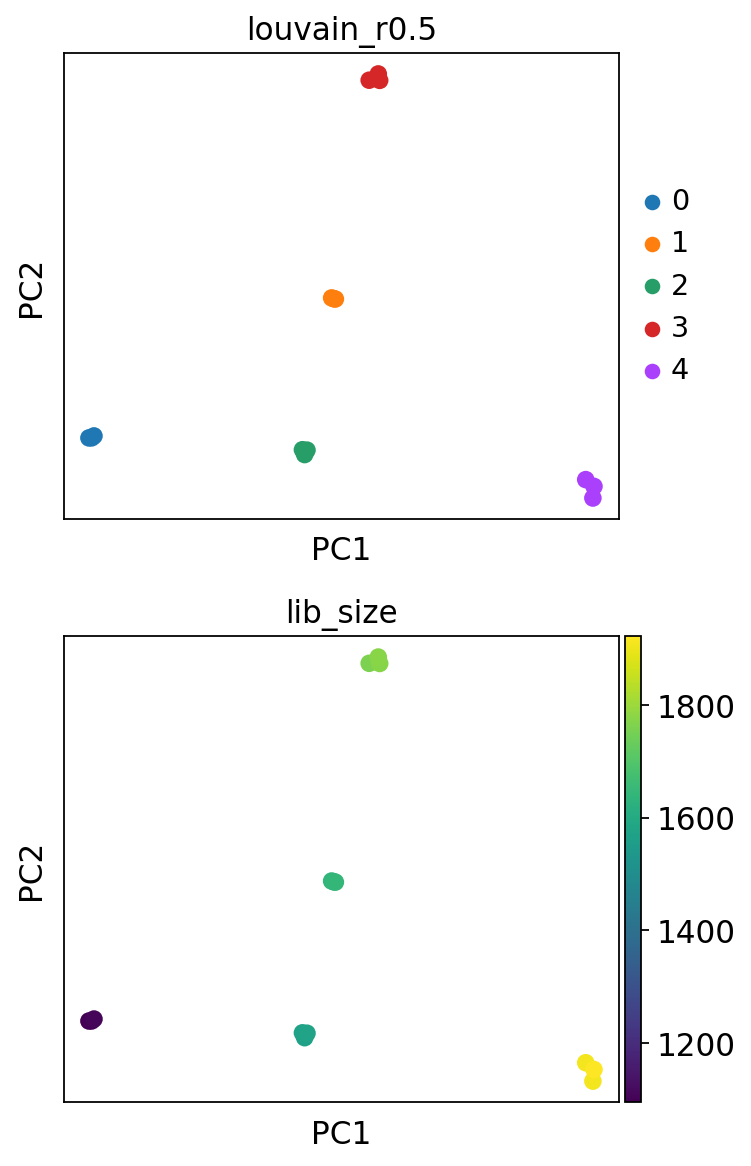

In [24]:
sc.pp.pca(pb_data)
sc.pl.pca(pb_data, color=pb_data.obs, ncols=1, size=250, save='/Bulk_PCA.pdf')
os.rename("figures/pca/Bulk_PCA.pdf", 
          "../results/task4/9591-2D/Bulk_PCA.pdf")
# isf_pancreatic_cancer/latest_notebook/figures/

In [25]:
# we will need to work with log-CPMs for fry
y = pb_data.X.T

In [26]:
%%R -i y
logCPM <- edgeR::cpm(y, log=TRUE, prior.count = 2)

In [27]:
%%R -o logCPM
logCPM = data.frame(logCPM)

In [28]:
pb_data.uns['logCPM_allgenes'] = logCPM.T

In [29]:
pb_data.obsm['logCPM_pca'] = sc.pp.pca(logCPM.T.to_numpy(), return_info = False)

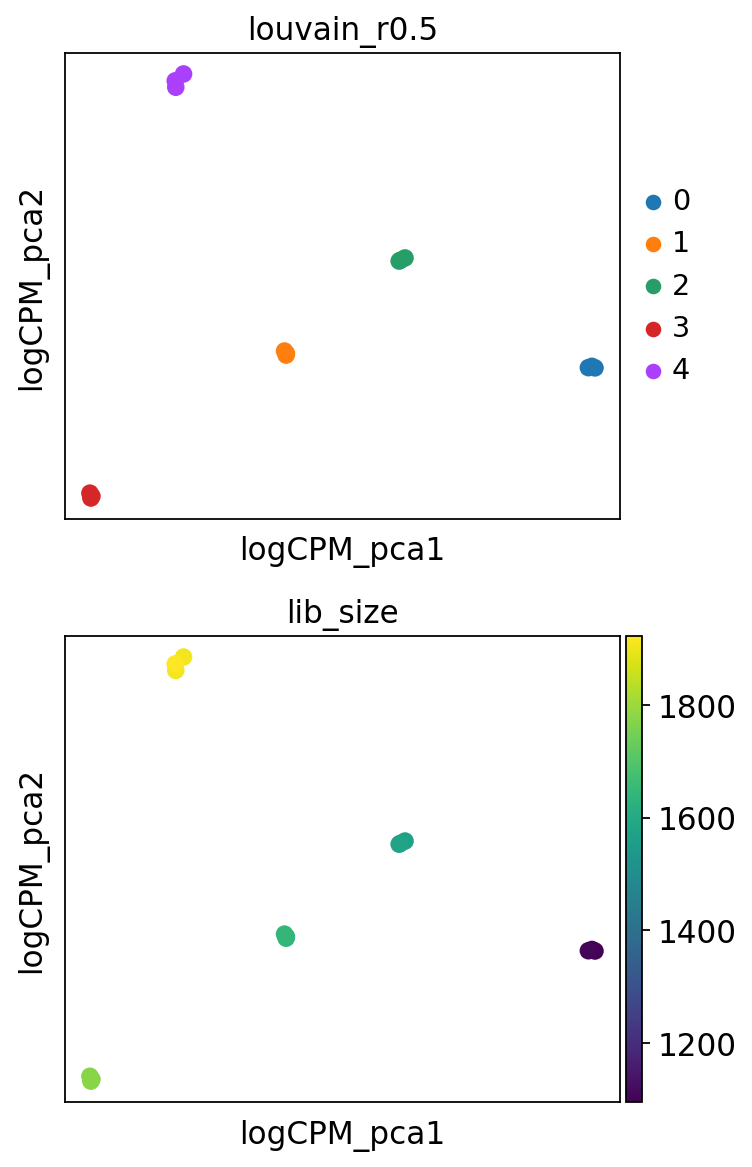

In [30]:
sc.pl.embedding(pb_data, 'logCPM_pca', color=pb_data.obs, ncols=1, size=250, save='')
os.rename("figures/logCPM_pca.pdf", 
          "../results/task4/9591-2D/logCPM_PCA.pdf")

In [31]:
groups = pb_data.obs['louvain_r0.5'].astype('string')

In [32]:
%%R -i groups
groups <- as.factor(groups)
levels(groups)

[1] "0" "1" "2" "3" "4"


In [33]:
%%R -i groups
group <-  as.factor(gsub(" |\\+","_", groups))
# design <- model.matrix(~ 0 + group)
design <- model.matrix(~groups)
head(design)

     [,1] [,2] [,3] [,4] [,5]
[1,]    1    0    0    0    0
[2,]    1    0    0    0    0
[3,]    1    0    0    0    0
[4,]    1    1    0    0    0
[5,]    1    1    0    0    0
[6,]    1    1    0    0    0


In [34]:
%%R
colnames(design)

[1] "(Intercept)" "groups1"     "groups2"     "groups3"     "groups4"    


In [35]:
%%R
print(design)

   (Intercept) groups1 groups2 groups3 groups4
1            1       0       0       0       0
2            1       0       0       0       0
3            1       0       0       0       0
4            1       1       0       0       0
5            1       1       0       0       0
6            1       1       0       0       0
7            1       0       1       0       0
8            1       0       1       0       0
9            1       0       1       0       0
10           1       0       0       1       0
11           1       0       0       1       0
12           1       0       0       1       0
13           1       0       0       0       1
14           1       0       0       0       1
15           1       0       0       0       1
attr(,"assign")
[1] 0 1 1 1 1
attr(,"contrasts")
attr(,"contrasts")$groups
[1] "contr.treatment"



Index the genes annotated in each pathway in our data as follows:

In [36]:
var_names = pb_data.var_names
idx = list(adata.obs_names)

In [37]:
%%R
# pathways <- list(albo2d_pathway, blownup2d_pathway, thicklike2d_pathway, treelike2d_pathway)
pathways <- list("albo2d" = albo2d_pathway, "blownup2d" =  blownup2d_pathway, "thicklike2d" = thicklike2d_pathway, "treelike2d" = treelike2d_pathway, "albo3d" = albo3d_pathway, "blownup3d" =  blownup3d_pathway, "thicklike3d" = thicklike3d_pathway, "treelike3d" = treelike3d_pathway)
pathways

$albo2d
 [1] "Acot1"     "Anxa13"    "Car8"      "Casp1"     "Casp4"     "Ccl2"     
 [7] "Ccn2"      "Cmtm3"     "Cp"        "Cpq"       "Crisp1"    "Cstdc2"   
[13] "Cyp4b1"    "Ddit4l"    "Depp1"     "Dnajc10"   "Ecscr"     "Flrt3"    
[19] "Gdf10"     "Gkn3"      "Hnf1aos1"  "Hspb1"     "Il18"      "Lbp"      
[25] "Lurap1l"   "Nepn"      "Nkain4"    "Prxl2b"    "Retreg1"   "Serpinb6b"
[31] "Serpinb9"  "Slfn2"     "Spink4"    "St3gal4"   "Trf"       "Vkorc1"   

$blownup2d
 [1] "Csn3"    "Cth"     "Dmbt1"   "Dok2"    "Fabp1"   "Galntl6" "Krt13"  
 [8] "Psat1"   "Soat1"   "Sult1c2"

$thicklike2d
 [1] "Ly6a"    "Cldn2"   "Igfbp7"  "Palmd"   "Ankmy1"  "Axl"     "Basp1"  
 [8] "Bcl3"    "Bpgm"    "Ckap4"   "Crip2"   "Crybg1"  "Ddit4"   "Eif4e3" 
[15] "F2r"     "Fxyd5"   "Galnt1"  "Gatm"    "Hbegf"   "Hmga2"   "Ildr2"  
[22] "Irx3"    "Krt14"   "Lrrc8c"  "Mad2l2"  "Map3k2"  "Msn"     "Nrarp"  
[29] "Pcolce2" "Pmepa1"  "Procr"   "Pros1"   "Ptp4a3"  "Rcc2"    "Serinc2"
[36] "Serp2"   "Slc

In [38]:
%R -i idx

In [39]:
%%R -i var_names
rownames(logCPM) <- var_names
# albo2d_pathway
# blownup2d_pathway
# thicklike2d_pathway
# treelike2d_pathway
# pathways <- albo2d_pathway
idx <- limma::ids2indices(pathways, rownames(logCPM))

As done in the `fgsea` method, let's remove gene sets with less than 15 genes

Now that we have set up the design and contrast matrices, and have indexed the genes in each pathway in our data, we can call `fry()` to test for enriched pathways in each of the contrasts we set above:

#### fry test for Stimulated vs Control

In [40]:
%%R
res0vs1 <- limma::fry(logCPM, index = idx, design = design, contrast = 2)
res0vs2 <- limma::fry(logCPM, index = idx, design = design, contrast = 3)
res0vs3 <- limma::fry(logCPM, index = idx, design = design, contrast = 4)
res0vs4 <- limma::fry(logCPM, index = idx, design = design, contrast = 5)

Let's print top few lines of fry's output

In [41]:
%%R
NUM_CHARS = 80
# trim long pathway names
rownames(res0vs1) <- sapply(rownames(res0vs1), FUN=function(x) ifelse(nchar(x) > NUM_CHARS, substr(x,1, NUM_CHARS), x))
print(head(res0vs1))
rownames(res0vs2) <- sapply(rownames(res0vs2), FUN=function(x) ifelse(nchar(x) > NUM_CHARS, substr(x,1, NUM_CHARS), x))
print(head(res0vs2))
rownames(res0vs3) <- sapply(rownames(res0vs3), FUN=function(x) ifelse(nchar(x) > NUM_CHARS, substr(x,1, NUM_CHARS), x))
print(head(res0vs3))
rownames(res0vs4) <- sapply(rownames(res0vs4), FUN=function(x) ifelse(nchar(x) > NUM_CHARS, substr(x,1, NUM_CHARS), x))
print(head(res0vs4))

            NGenes Direction       PValue          FDR PValue.Mixed
thicklike2d     38        Up 1.249621e-08 9.996965e-08 8.381763e-15
thicklike3d    361        Up 7.470724e-08 2.988290e-07 8.662170e-18
blownup2d        4        Up 3.693181e-05 9.848483e-05 4.209919e-02
blownup3d       25      Down 5.938886e-05 1.187777e-04 4.856425e-16
albo3d          85        Up 2.659404e-04 4.255046e-04 4.289222e-15
treelike3d      10        Up 1.560969e-02 2.081292e-02 4.078149e-04
               FDR.Mixed
thicklike2d 1.676353e-14
thicklike3d 6.929736e-17
blownup2d   4.837303e-02
blownup3d   1.942570e-15
albo3d      1.143792e-14
treelike3d  6.525039e-04
            NGenes Direction       PValue          FDR PValue.Mixed
albo3d          85        Up 5.862319e-13 4.689855e-12 8.957029e-16
thicklike3d    361      Down 1.463290e-12 5.853160e-12 9.745112e-20
albo2d          20        Up 3.376923e-12 9.005127e-12 8.717330e-15
thicklike2d     38      Down 6.018557e-09 1.203711e-08 4.224737e-15
blownup2d

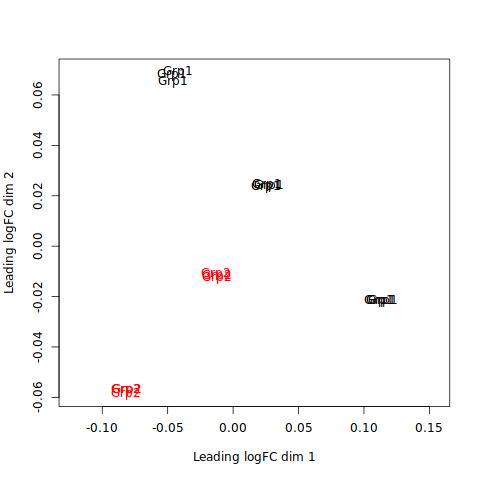

In [42]:
%%R
limma::plotMDS(logCPM,  col=c(rep("black",3), rep("red",3)), labels= c(rep("Grp1",3), rep("Grp2",3)))

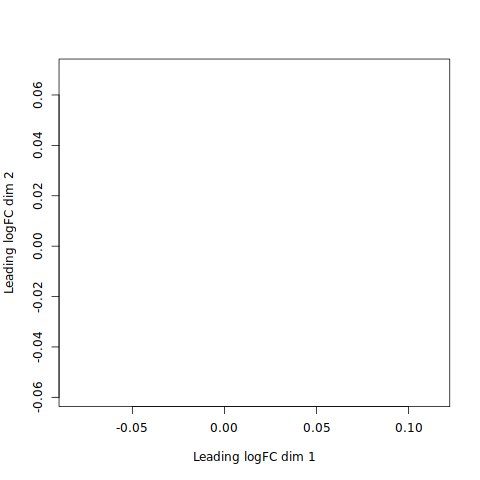

In [43]:
%%R
limma::plotMDS(logCPM, pch = 19, col = c(1:5)[groups])

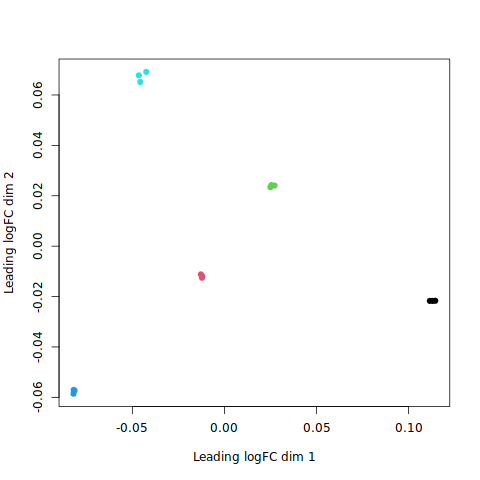

In [44]:
%%R
limma::plotMDS(logCPM, pch = 19, col = c(1:5)[as.factor(groups)])

In [45]:
%R -o res0vs1
%R -o res0vs2
%R -o res0vs3
%R -o res0vs4

In [46]:
res0vs4

NGenes Direction        PValue           FDR  PValue.Mixed  \
thicklike2d      38        Up  3.913968e-08  2.519188e-07  1.065241e-13   
thicklike3d     361      Down  6.297970e-08  2.519188e-07  2.899512e-19   
blownup3d        25      Down  5.232146e-07  1.395239e-06  2.584476e-18   
albo3d           85      Down  7.337349e-03  1.467470e-02  9.920589e-17   
blownup2d         4        Up  1.795803e-02  2.873284e-02  1.433411e-02   
treelike2d        9        Up  7.982352e-02  1.064314e-01  6.611616e-03   
treelike3d       10        Up  2.030559e-01  2.320639e-01  6.566222e-03   
albo2d           20      Down  2.467457e-01  2.467457e-01  1.336129e-12   

                FDR.Mixed  
thicklike2d  2.130482e-13  
thicklike3d  2.319609e-18  
blownup3d    1.033790e-17  
albo3d       2.645490e-16  
blownup2d    1.433411e-02  
treelike2d   7.556133e-03  
treelike3d   7.556133e-03  
albo2d       2.137806e-12

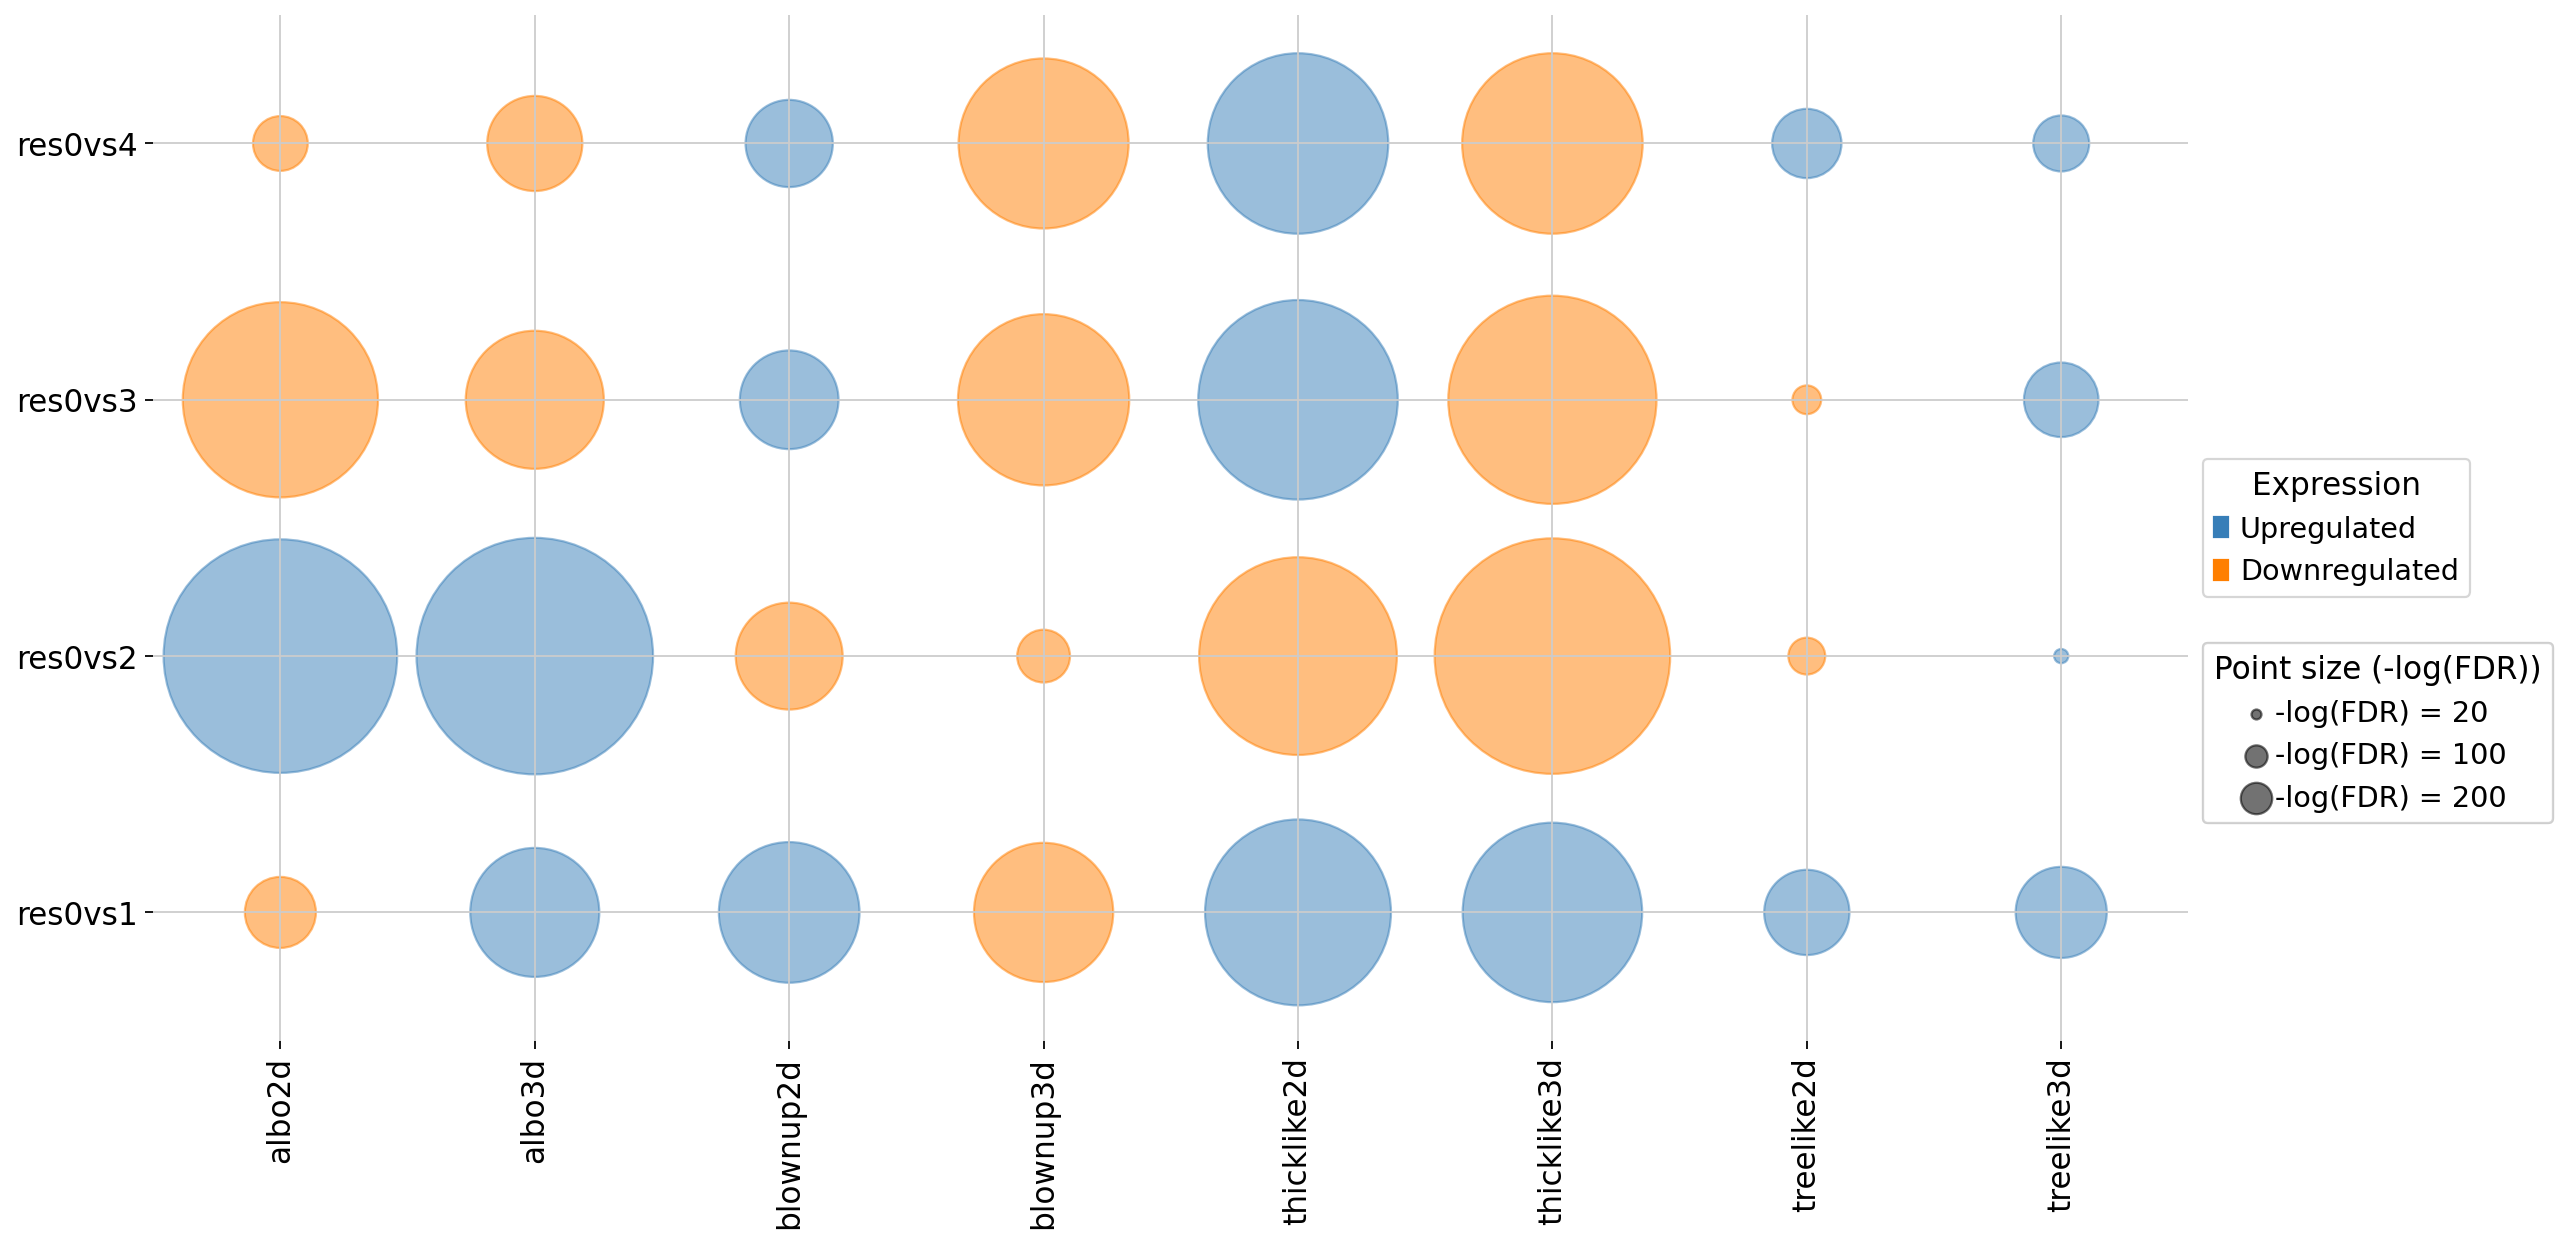

In [61]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(14,8))
res0vs1.sort_index(axis=0, ascending=True, inplace=True)
res0vs2.sort_index(axis=0, ascending=True, inplace=True)
res0vs3.sort_index(axis=0, ascending=True, inplace=True)
res0vs4.sort_index(axis=0, ascending=True, inplace=True)


dfs = [res0vs1, res0vs2, res0vs3, res0vs4]
x = res0vs1.index.values  # all the same
y = ['res0vs1', 'res0vs2', 'res0vs3', 'res0vs4']
sizes=[]

for i, df in enumerate(dfs):
    c = df['Direction'].apply(lambda x: '#377eb8' if x == 'Up' else '#ff7f00').values
    size = -10 * np.log10(df['FDR'].values)
    sizes.append(size)
    ax.scatter(x, np.ones_like(x) * y[i], c=c, s=100 * size, alpha=0.5)

ax.set_yticks(y)
ax.set_yticklabels(y)
ax.set_xticks(x)
ax.set_xticklabels(x)

# Adjust axis limits
ax.set_xlim([-0.5, 7.5])
ax.set_ylim([-0.5, 3.5])

# Adjust subplot parameters to have less space between plots
# fig.subplots_adjust(left=0.5, bottom=0.1, right=0.9, top=0.9, hspace=0.1)
plt.xticks(rotation=90)  # rotate x-axis labels by 90 degrees
fig.tight_layout()  # adjust subplot parameters to minimize overlap

# Removing outer lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()

# Add first legend
red_patch = mpatches.Patch(color='#377eb8', label='Upregulated')
blue_patch = mpatches.Patch(color='#ff7f00', label='Downregulated')
legend1 = ax.legend(handles=[red_patch, blue_patch], loc='center left', bbox_to_anchor=(1, 0.5), title='Expression')

# Add second legend
sample_sizes = [20, 100, 200]
sample_labels = ['-log(FDR) = ' + str(size) for size in sample_sizes]
sample_scatters = [plt.scatter([], [], s=size, color='black', alpha=0.5) for size in sample_sizes]
legend2 = ax.legend(sample_scatters, sample_labels, loc='center left', bbox_to_anchor=(1, 0.3), title='Point size (-log(FDR))')

ax.add_artist(legend1)
ax.add_artist(legend2)
save_dir = '../results/task4/9591-2D/9591-2D_dotplot.pdf'
plt.savefig(save_dir, bbox_inches='tight')

plt.show()


In [59]:
res0vs1.to_excel('../results/task4/9591-2D/fry_result_cluster0vs1.xlsx')
res0vs2.to_excel('../results/task4/9591-2D/fry_result_cluster0vs2.xlsx')
res0vs3.to_excel('../results/task4/9591-2D/fry_result_cluster0vs3.xlsx')
res0vs4.to_excel('../results/task4/9591-2D/fry_result_cluster0vs4.xlsx')

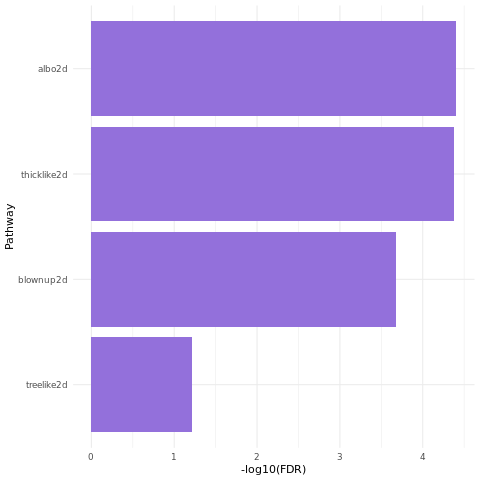

In [60]:
%%R
NUM_CHARS <- 50
ggdat <- res0vs1[1:4,]
ggdat$pathway <- sapply(rownames(ggdat), FUN=function(x) ifelse(nchar(x) > NUM_CHARS, substr(x,1, NUM_CHARS), x))
ggplot(ggdat, aes(x=reorder(pathway, -log10(FDR)), y = -log10(FDR))) +
    geom_bar(stat="identity", fill = "#9370DB") + coord_flip() +
    xlab('Pathway') + theme_minimal()

#### fry test for the comparison between two stimulated cell types

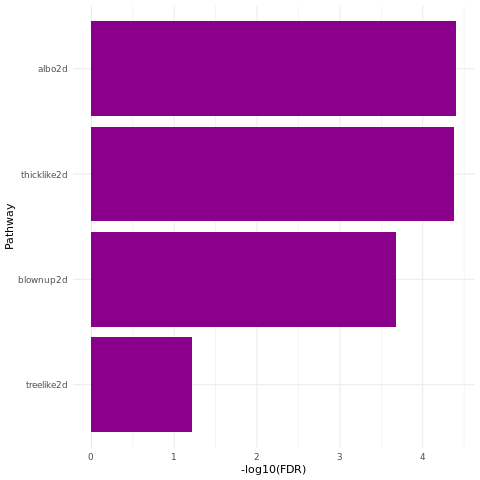

In [61]:
%%R
ggdat <- res0vs1[1:4,]
ggdat$pathway <- sapply(rownames(ggdat), FUN=function(x) ifelse(nchar(x) > NUM_CHARS, substr(x,1, NUM_CHARS), x))
ggplot(ggdat, aes(x=reorder(pathway, -log10(FDR)), y = -log10(FDR))) +
    geom_bar(stat="identity", fill = "#8B008B") + coord_flip() +
    xlab('Pathway') + theme_minimal()

In [62]:
%%R -i y
logCPM <- edgeR::cpm(y, log=TRUE, prior.count = 2)

In [63]:
%%R -o logCPM
logCPM = data.frame(logCPM)

In [64]:
pb_data.uns['logCPM_FLE'] = logCPM.T # FLE for filter low exprs

In [65]:
pb_data.obsm['logCPM_FLE_pca'] = sc.pp.pca(logCPM.T.to_numpy(), return_info = False)

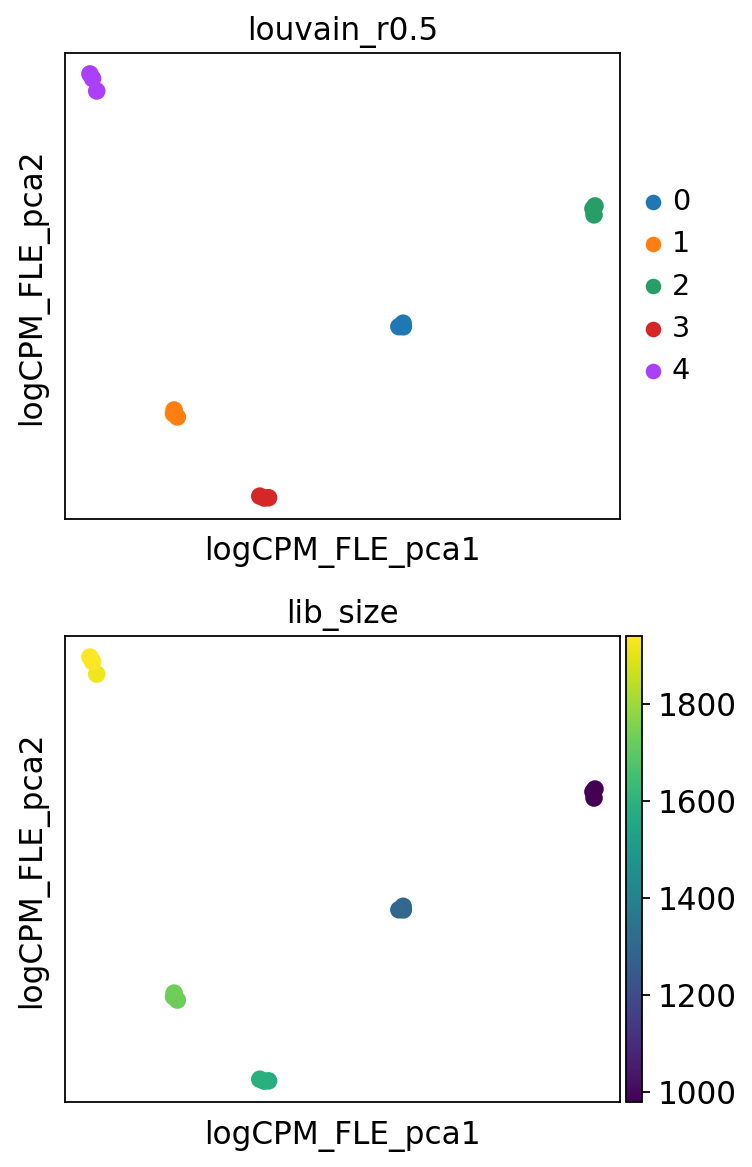

In [66]:
sc.pl.embedding(pb_data, 'logCPM_FLE_pca', color=pb_data.obs, ncols=1, size=250, save='')
os.rename("figures/logCPM_FLE_pca.pdf", 
          "../results/task4/9591-2D/logCPM_FLE_PCA.pdf")

### FGSEA

In [67]:
sc.tl.rank_genes_groups(adata, 'group', method='t-test', key_added = "t-test")

In [68]:
celltype_condition = '4' # 0, 1, 2, 3, 4

In [69]:
adata.uns['t-test']['names'][celltype_condition]

array(['Rpl13', 'Rpl6', 'Rps4x', ..., 'Fosb', 'Krt19', 'Spp1'],
      dtype=object)

In [70]:
# extract ranked gene names and export to r
ranked_genes_ = adata.uns['t-test']['names'][celltype_condition]

In [71]:
%%R -i ranked_genes_
ranked_genes = ranked_genes_
head(ranked_genes)

[1] "Rpl13" "Rpl6"  "Rps4x" "Rps11" "Rps24" "Rps20"


In [72]:
# compute ranks and export to r
stats_ = adata.uns['t-test']['scores'][celltype_condition]

In [73]:
%%R -i stats_
stats = stats_

In [74]:
%%R
names(stats) = ranked_genes

In [75]:
%R -o stats

In [76]:
stats_df = pd.DataFrame(stats, index=ranked_genes_, columns=['Stats'])

In [77]:
%%R 
fgseaRes <- fgsea(pathways = pathways, 
                  stats    = stats,
                  eps      = 0.0,
                  minSize  = 15,
                  maxSize  = 500)
fgseaRes

       pathway      pval      padj    log2err        ES       NES size
1:      albo2d 0.6559031 0.6559031 0.03352972 0.4152023 0.8822133   20
2: thicklike2d 0.1721722 0.3443443 0.10027911 0.5411265 1.1963560   38
                                    leadingEdge
1: Serpinb6b,Car8,Trf,Vkorc1,St3gal4,Ddit4l,...
2:   Pmepa1,Hmga2,Basp1,Hbegf,Tspan13,Tnnt2,...


In [78]:
%%R
pathway <- fgseaRes[[1]]
pval <- fgseaRes[[2]]
padj <- fgseaRes[[3]]
log2err <- fgseaRes[[4]]
ES <- fgseaRes[[5]]
NES <- fgseaRes[[6]]
size <- fgseaRes[[7]]

In [79]:
%R -o pathway
%R -o pval
%R -o padj
%R -o log2err
%R -o ES
%R -o NES
%R -o size

In [80]:
df = pd.DataFrame({'Pathway': np.array(pathway), 'PVAL': np.array(pval), 'Adjusted PVAL': np.array(padj), 'log2 Error': np.array(log2err), 'ES': np.array(ES), 'NES': np.array(NES), 'Size': np.array(size)})
df.to_excel('../results/task4/9591-2D/fgsea_results' + celltype_condition + '.xlsx')

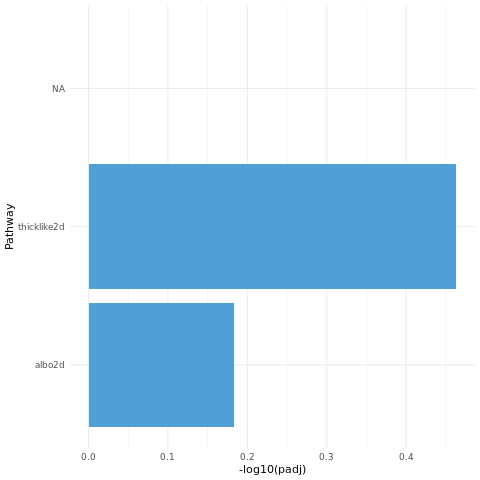

In [81]:
%%R
ggdat <- fgseaRes[order(fgseaRes$padj, decreasing=FALSE), ][1:20,]
ggplot(ggdat, aes(x=reorder(pathway, -log10(padj)), y = -log10(padj))) +
    geom_bar(stat="identity", fill = "#51A0D5") + coord_flip() +
    xlab('Pathway') + theme_minimal()

In [82]:
save_dir = '../results/task4/9591-2D/fgsea_result_cluster' + celltype_condition + '.pdf'

In [83]:
%R -i save_dir

In [84]:
%%R 
ggsave(
  # 'git/isf_pancreatic_cancer/latest_notebook/figures/fgsea/9591-2D/cluster0.pdf',
  save_dir,
  plot = last_plot(),
  device = NULL,
  path = NULL,
  scale = 1,
  width = NA,
  height = NA,
  units = c("in", "cm", "mm", "px"),
  dpi = 300,
  limitsize = TRUE,
  bg = NULL,
)

R[write to console]: Saving 6.67 x 6.67 in image



b) UMAPs for specific genes

Branched mesenchymal, firework, starlike2 for the 16992 & ALBO, blownup, thick-like, tree-like for the 9591

In [15]:
# overlap marker gene lists from Aristeidis Papargyriou
overlap_ALBO = ['Car8', 'Casp1', 'Casp4', 'Cmtm3', 'Cpq', 'Cstdc2', 'Cyp4b1', 'Dnajc10', 'Ecscr', 'Flrt3', 'Gdf10', 'Gkn3', 'Lbp', 'Nepn', 'Serpinb9']
overlap_blownup = ['Dmbt1', 'Krt13']
overlap_thick_like = ['Ckap4', 'Crip2', 'Fxyd5', 'Hbegf', 'Krt14', 'Nrarp', 'Serinc2', 'Serp2', 'Tenm4', 'Tns4', 'Tspan13', 'Ube2j1']
overlap_tree_like = ['Il1rn', 'Acsm3', 'Dio3', 'Dio3os', 'Lipa', 'Maoa', 'Nid1', 'Nqo1', 'Spint1', 'Upk1b']

In [16]:
#Define a nice colour map for gene expression
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

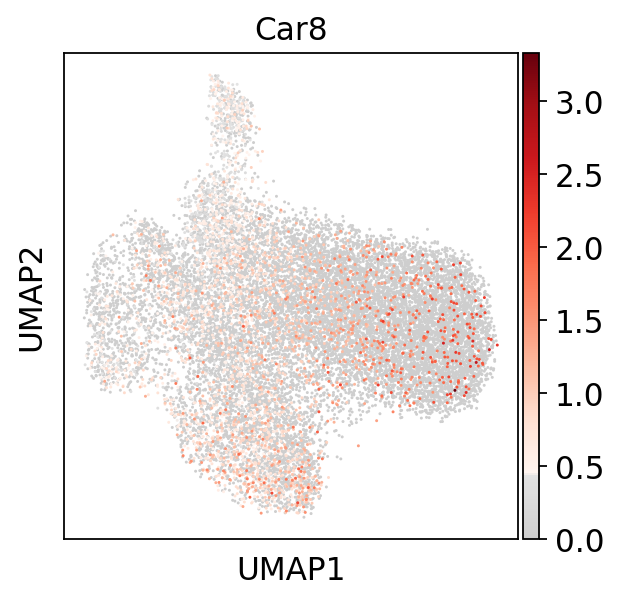

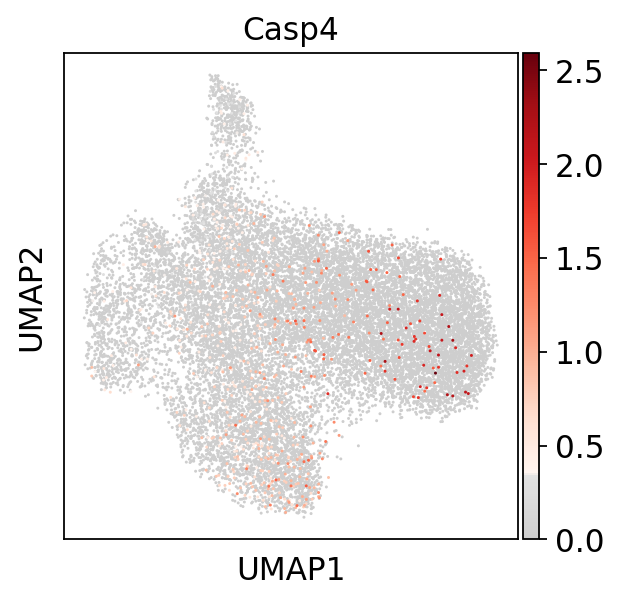

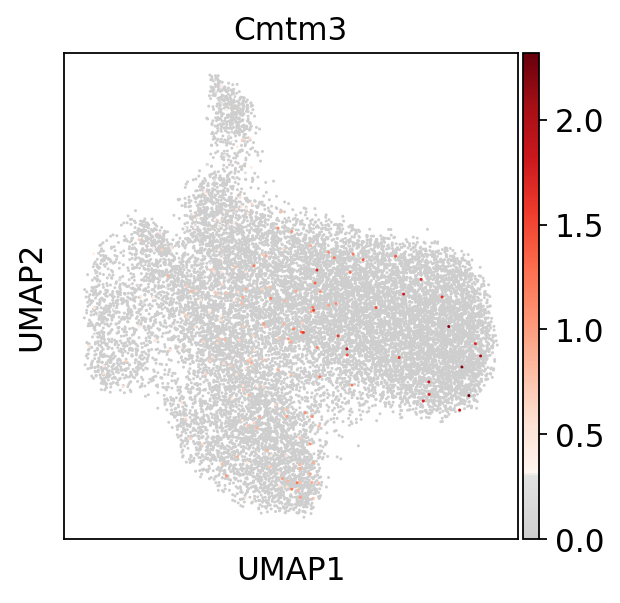

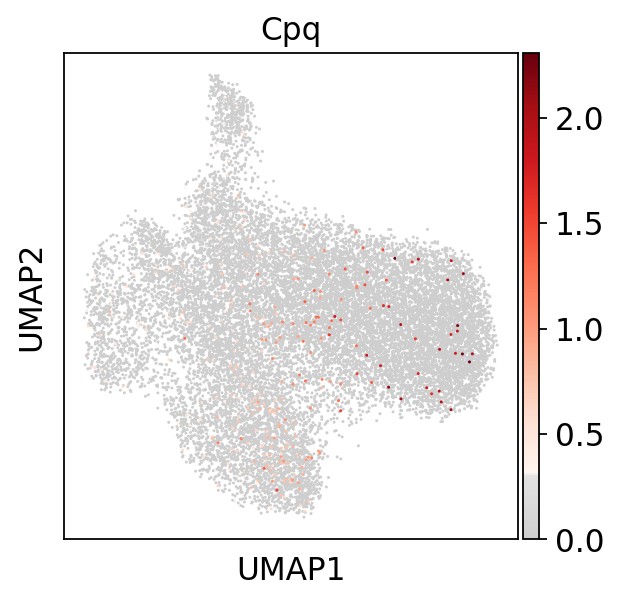

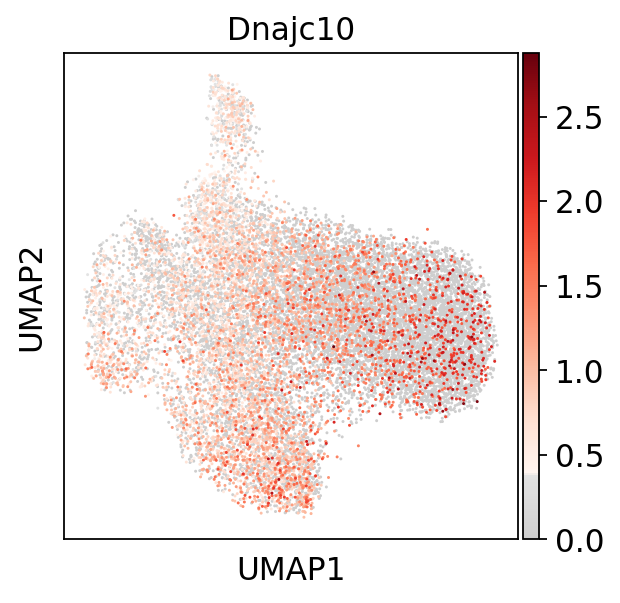

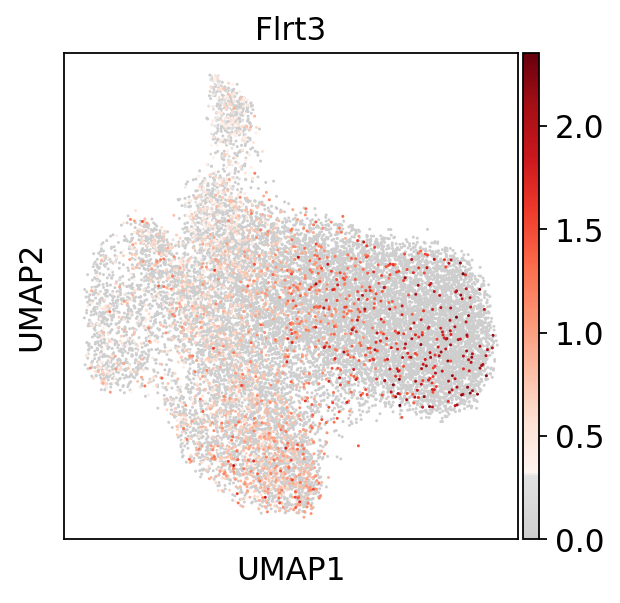

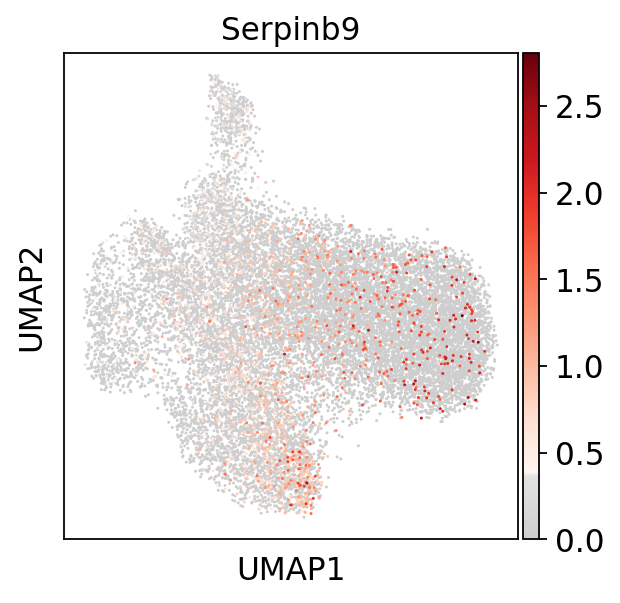

These genes are in the list but not in the adata:  ['Casp1', 'Cstdc2', 'Cyp4b1', 'Ecscr', 'Gdf10', 'Gkn3', 'Lbp', 'Nepn']


In [18]:
# ALBO
not_fits = []
for gene in overlap_ALBO: 
    if gene in adata.var_names:
        sc.pl.umap(adata, color=gene, use_raw=False, color_map=mymap, save='/9591-2D/ALBO_' + gene + '.pdf')
        os.rename("figures/umap/9591-2D/ALBO_" + gene + ".pdf", 
                  "../results/extra_q/9591-2D/ALBO_" + gene + ".pdf")
    else:
        not_fits.append(gene)
print('These genes are in the list but not in the adata: ', not_fits)

In [19]:
# blownup
not_fits = []
for gene in overlap_blownup: 
    if gene in adata.var_names:
        sc.pl.umap(adata, color=gene, use_raw=False, color_map=mymap, save='/9591-2D/blownup_' + gene + '.pdf')
        os.rename("figures/umap/9591-2D/blownup_" + gene + ".pdf", 
                  "../results/extra_q/9591-2D/blownup_" + gene + ".pdf")
    else:
        not_fits.append(gene)
print('These genes are in the list but not in the adata: ', not_fits)

These genes are in the list but not in the adata:  ['Dmbt1', 'Krt13']


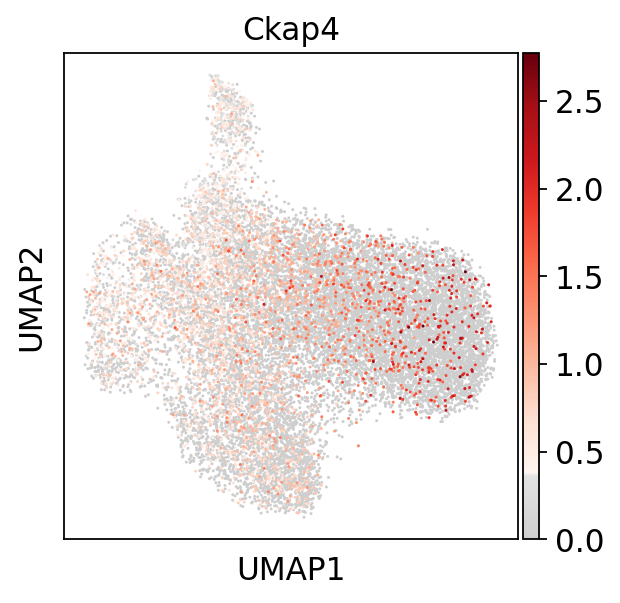

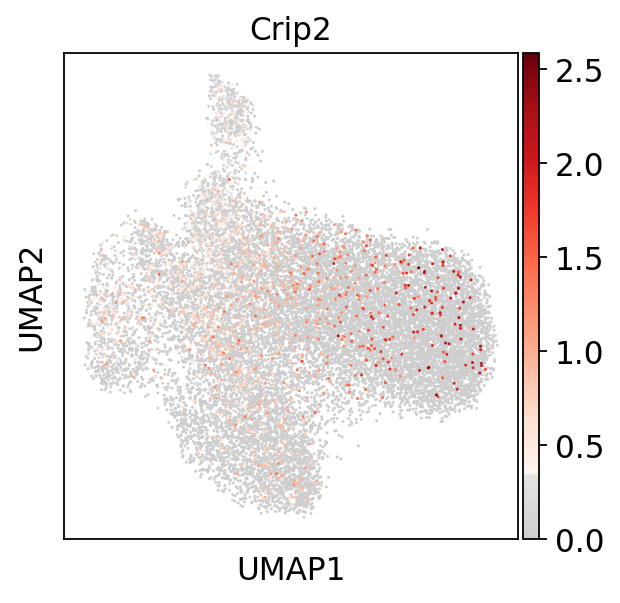

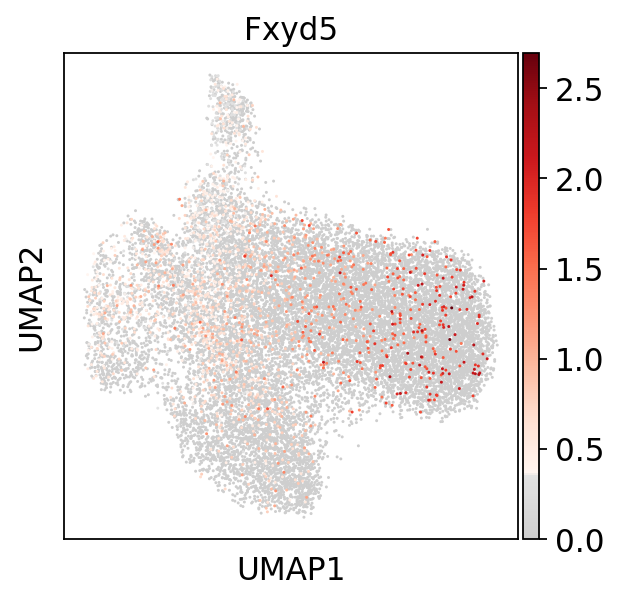

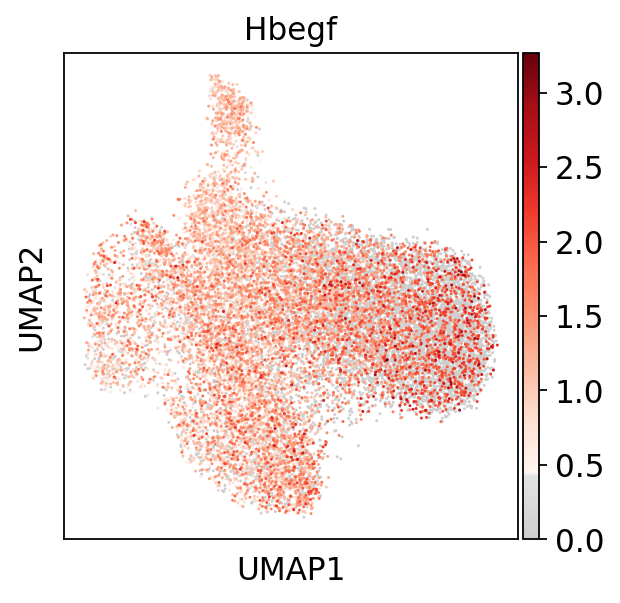

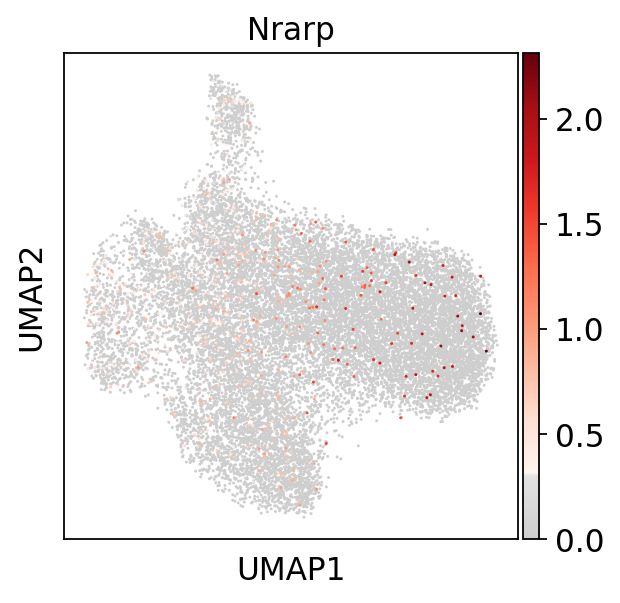

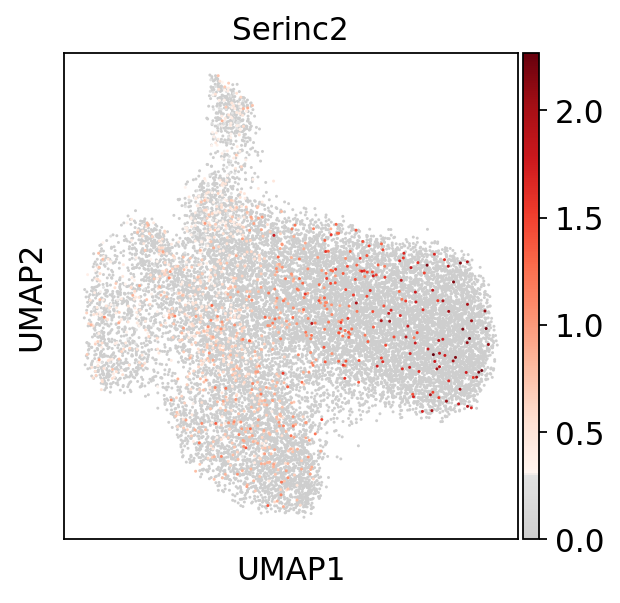

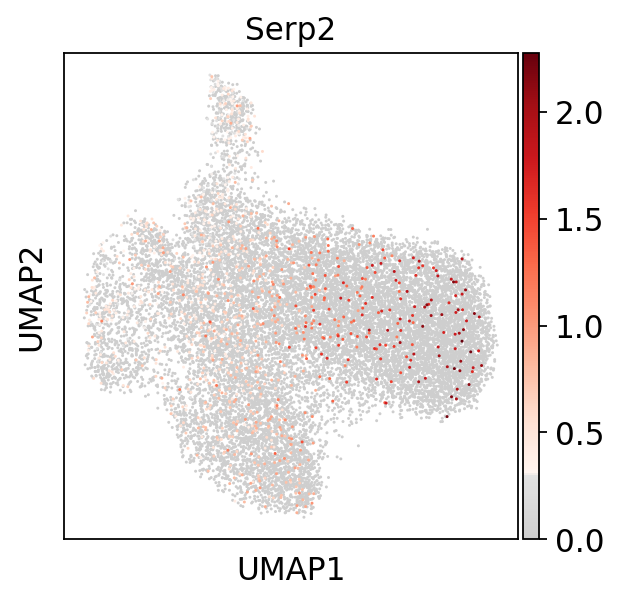

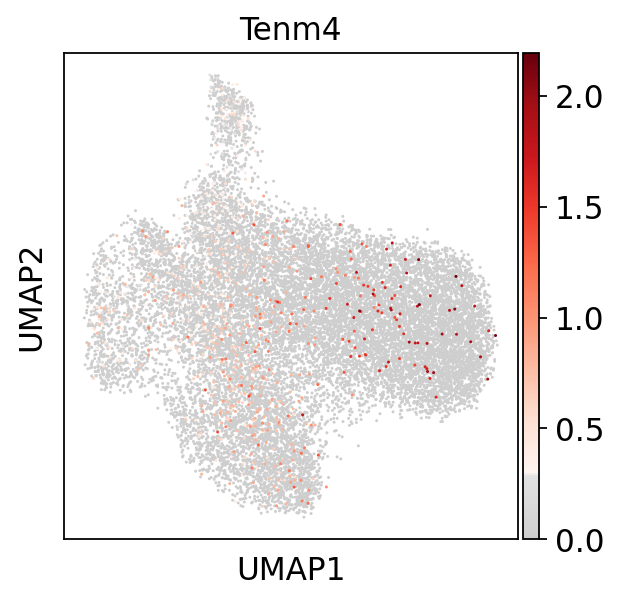

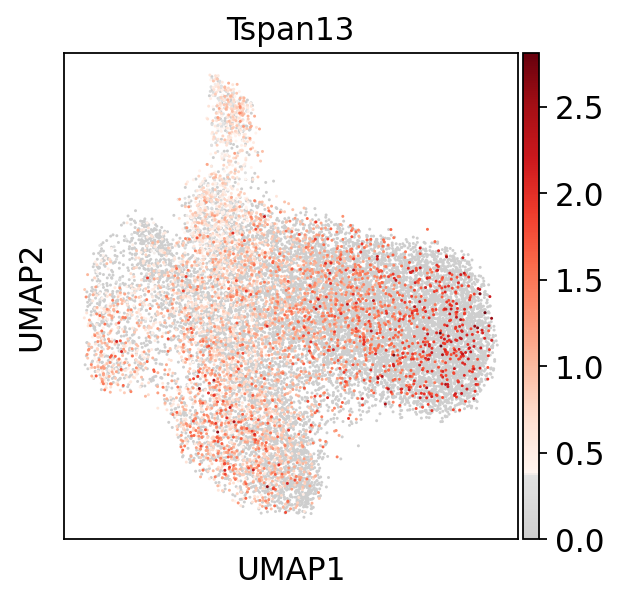

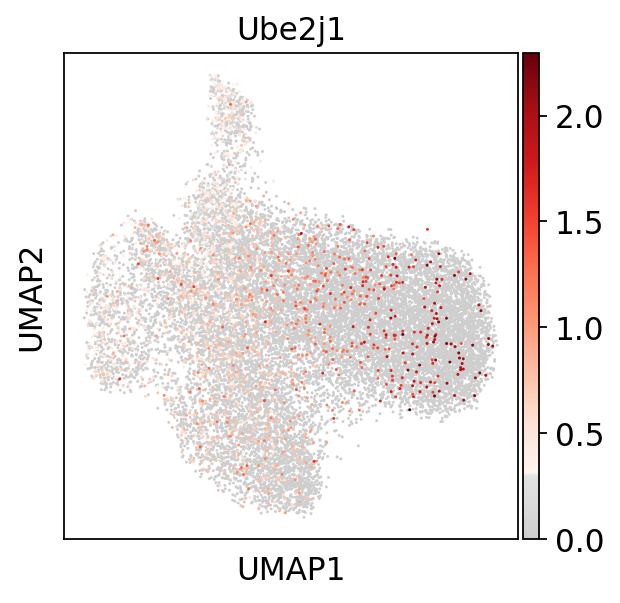

These genes are in the list but not in the adata:  ['Krt14', 'Tns4']


In [22]:
# thick_like
not_fits = []
for gene in overlap_thick_like :
    if gene in adata.var_names:
        sc.pl.umap(adata, color=gene, use_raw=False, color_map=mymap, save='/9591-2D/thick_like_' + gene + '.pdf')
        os.rename("figures/umap/9591-2D/thick_like_" + gene + ".pdf", 
                  "../results/extra_q/9591-2D/thick_like_" + gene + ".pdf")
    else:
        not_fits.append(gene)
print('These genes are in the list but not in the adata: ', not_fits)

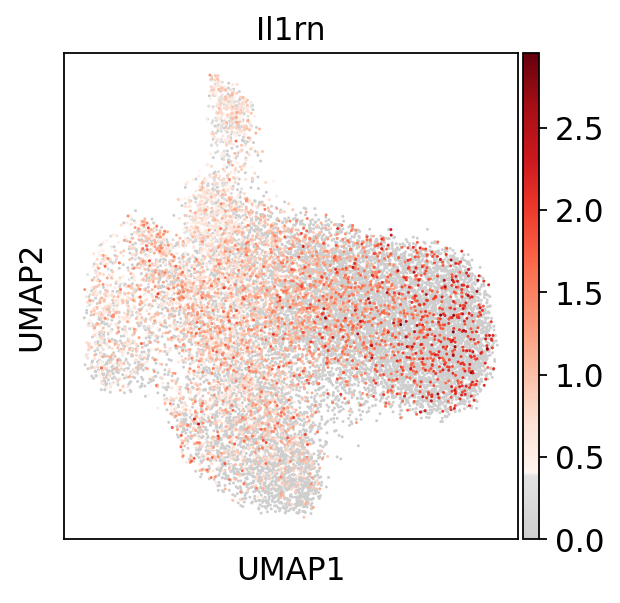

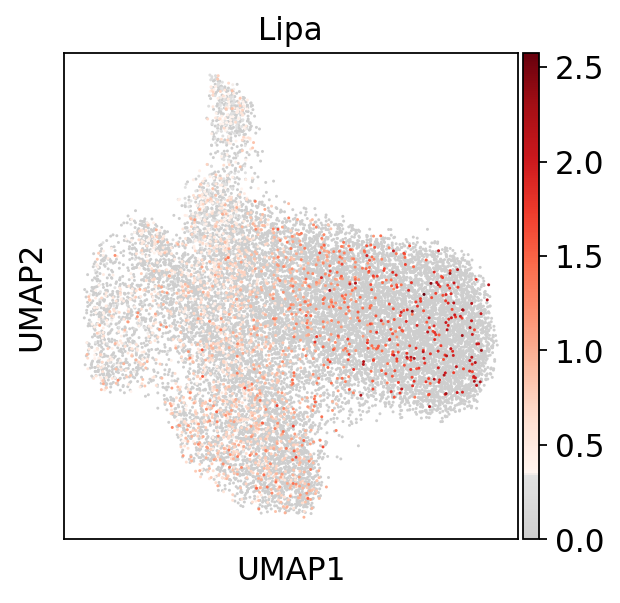

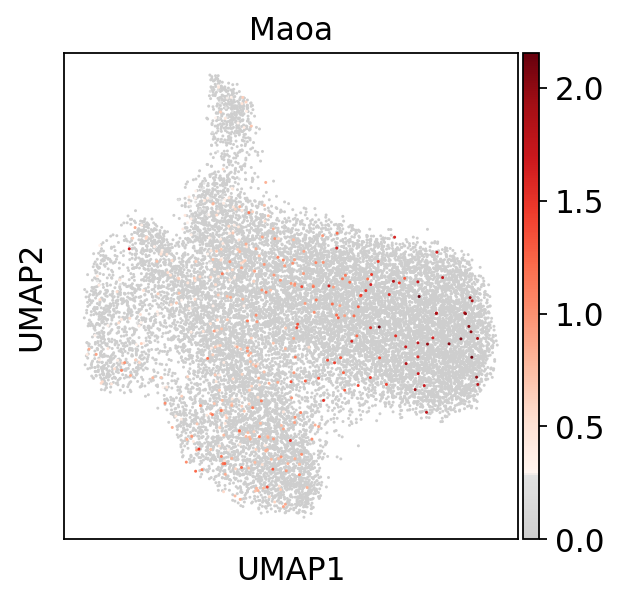

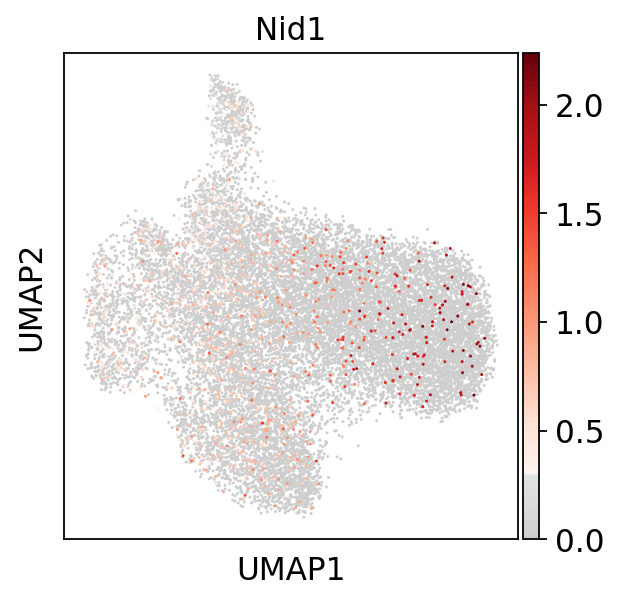

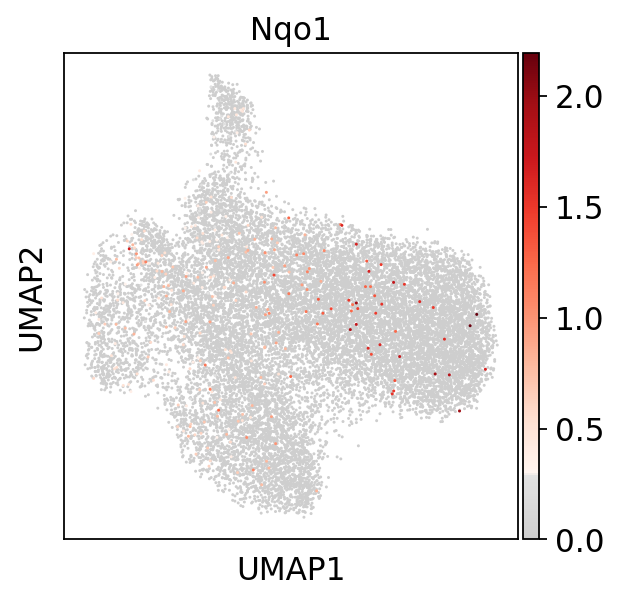

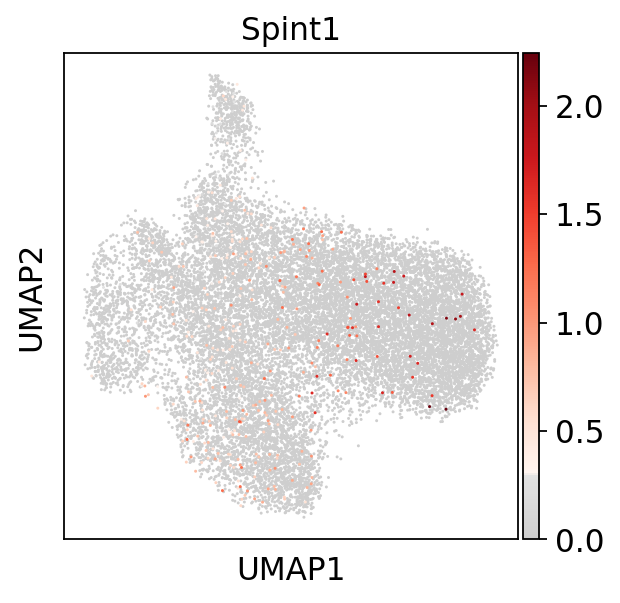

These genes are in the list but not in the adata:  ['Acsm3', 'Dio3', 'Dio3os', 'Upk1b']


In [21]:
# tree_like
not_fits = []
for gene in overlap_tree_like: 
    if gene in adata.var_names:
        sc.pl.umap(adata, color=gene, use_raw=False, color_map=mymap, save='/9591-2D/tree_like_' + gene + '.pdf')
        os.rename("figures/umap/9591-2D/tree_like_" + gene + ".pdf", 
                  "../results/extra_q/9591-2D/tree_like_" + gene + ".pdf")
    else:
        not_fits.append(gene)
print('These genes are in the list but not in the adata: ', not_fits)